In [2]:

# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


memecombined= pd.read_csv("Updated.csv")

In [3]:
memecombined

,date,count_title_x,negative_mean_title,positive_mean_title,neutral_mean_title,compound_mean_title,count_body_x,negative_mean_body,positive_mean_body,neutral_mean_body,...,neutral_mean_clov_body,compound_mean_clov_body,Clov,BB,AMC,GME,count_title_y,average_title,count_body_y,average_body
0,2021-01-28,1192,0.087679,0.078799,0.832689,-0.007051,684,0.089819,0.095503,0.813212,...,NaN,NaN,14.07,14.65,8.63,193.60,1192.0,-0.007051,684.0,0.049073
1,2021-01-29,15653,0.086568,0.079090,0.833768,-0.014411,9034,0.089565,0.093308,0.816350,...,NaN,NaN,13.95,14.10,13.26,325.00,15653.0,-0.014411,9034.0,0.005164
2,2021-01-30,1422,0.077357,0.096356,0.825584,0.036902,648,0.081015,0.115835,0.803154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-31,937,0.077020,0.099076,0.822843,0.039319,426,0.087824,0.115261,0.796904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,880,0.074460,0.103527,0.822012,0.037553,319,0.075276,0.114342,0.810364,...,NaN,NaN,13.81,14.63,13.30,225.00,880.0,0.037553,319.0,0.379849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2021-08-12,75,0.056093,0.116000,0.827907,0.074153,35,0.039257,0.136029,0.824743,...,0.9160,0.94990,9.01,10.17,33.07,162.35,75.0,0.074153,35.0,0.731189
172,2021-08-13,64,0.104156,0.166516,0.729344,0.069134,31,0.057129,0.142742,0.800032,...,0.7875,0.59980,8.22,9.88,33.47,162.52,64.0,0.069134,31.0,0.607048
173,2021-08-14,37,0.070000,0.067459,0.862541,-0.028578,16,0.069312,0.126312,0.804500,...,0.7935,0.71465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,2021-08-15,21,0.071048,0.105381,0.823571,0.020481,17,0.062588,0.134941,0.802529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

def normalize_data(df):
    minimum = min(df)
    maximum = max(df)
    x = df
    y = (x - minimum) / (maximum  - minimum)
    return y

memecombined.columns

Index(['date', 'count_title_x', 'negative_mean_title', 'positive_mean_title',
       'neutral_mean_title', 'compound_mean_title', 'count_body_x',
       'negative_mean_body', 'positive_mean_body', 'neutral_mean_body',
       'compound_mean_body', 'count_gme_title', 'negative_mean_gme_title',
       'positive_mean_gme_title', 'neutral_mean_gme_title',
       'compound_mean_gme_title', 'count_gme_body', 'negative_mean_gme_body',
       'positive_mean_gme_body', 'neutral_mean_gme_body',
       'compound_mean_gme_body', 'count_amc_title', 'negative_mean_amc_title',
       'positive_mean_amc_title', 'neutral_mean_amc_title',
       'compound_mean_amc_title', 'count_amc_body', 'negative_mean_amc_body',
       'positive_mean_amc_body', 'neutral_mean_amc_body',
       'compound_mean_amc_body', 'count_bb_title', 'negative_mean_bb_title',
       'positive_mean_bb_title', 'neutral_mean_bb_title',
       'compound_mean_bb_title', 'count_bb_body', 'negative_mean_bb_body',
       'positive_mean_bb_b

In [5]:
memecombined = memecombined.dropna()
memecombined

,date,count_title_x,negative_mean_title,positive_mean_title,neutral_mean_title,compound_mean_title,count_body_x,negative_mean_body,positive_mean_body,neutral_mean_body,...,neutral_mean_clov_body,compound_mean_clov_body,Clov,BB,AMC,GME,count_title_y,average_title,count_body_y,average_body
6,2021-02-03,2626,0.086958,0.113625,0.798660,0.031520,675,0.082336,0.114529,0.803127,...,0.863500,0.985700,13.95,12.00,8.97,92.41,2626.0,0.031520,675.0,0.232041
7,2021-02-04,1665,0.072601,0.110745,0.816656,0.049775,858,0.083678,0.115802,0.800520,...,0.840333,-0.303833,12.23,12.15,7.09,53.50,1665.0,0.049775,858.0,0.189707
8,2021-02-05,2585,0.083585,0.108735,0.807296,0.030021,1659,0.092691,0.114858,0.791861,...,0.793200,-0.211500,12.93,13.23,6.83,63.77,2585.0,0.030021,1659.0,0.127588
11,2021-02-08,284,0.062028,0.123190,0.814782,0.099527,127,0.070567,0.122315,0.807047,...,0.787000,0.273200,12.37,13.76,6.18,60.00,284.0,0.099527,127.0,0.346654
34,2021-03-03,589,0.043593,0.136857,0.819553,0.130694,165,0.056333,0.124600,0.819097,...,0.720000,0.250800,8.29,10.15,8.58,124.18,589.0,0.130694,165.0,0.464815
83,2021-04-21,69,0.065159,0.174478,0.760362,0.111536,21,0.051238,0.109762,0.839143,...,0.842500,0.897550,9.05,8.66,9.78,158.51,69.0,0.111536,21.0,0.437814
90,2021-04-28,84,0.034595,0.145369,0.820048,0.138961,31,0.047226,0.135484,0.817258,...,0.792250,0.968925,10.50,9.30,10.85,178.58,84.0,0.138961,31.0,0.658016
91,2021-04-29,93,0.029000,0.141677,0.829323,0.157444,33,0.048636,0.129394,0.822061,...,0.954000,0.585900,10.17,9.06,10.20,176.19,93.0,0.157444,33.0,0.651712
95,2021-05-06,161,0.058261,0.105155,0.836578,0.071437,58,0.047707,0.118466,0.833793,...,0.799000,0.959867,8.23,8.15,9.00,161.01,161.0,0.071437,58.0,0.597726
101,2021-05-12,92,0.051250,0.117522,0.831228,0.092959,43,0.054860,0.121093,0.824093,...,0.845000,0.959700,7.78,7.95,10.32,144.79,92.0,0.092959,43.0,0.520123


In [6]:
memecombined[['GME','AMC', 'BB', 'Clov' ,'average_body']].corr()

,GME,AMC,BB,Clov,average_body
GME,1.000000,0.835803,0.230610,0.263978,0.853199
AMC,0.835803,1.000000,0.608761,0.509533,0.639769
BB,0.230610,0.608761,1.000000,0.866901,0.040120
Clov,0.263978,0.509533,0.866901,1.000000,0.039234
average_body,0.853199,0.639769,0.040120,0.039234,1.000000


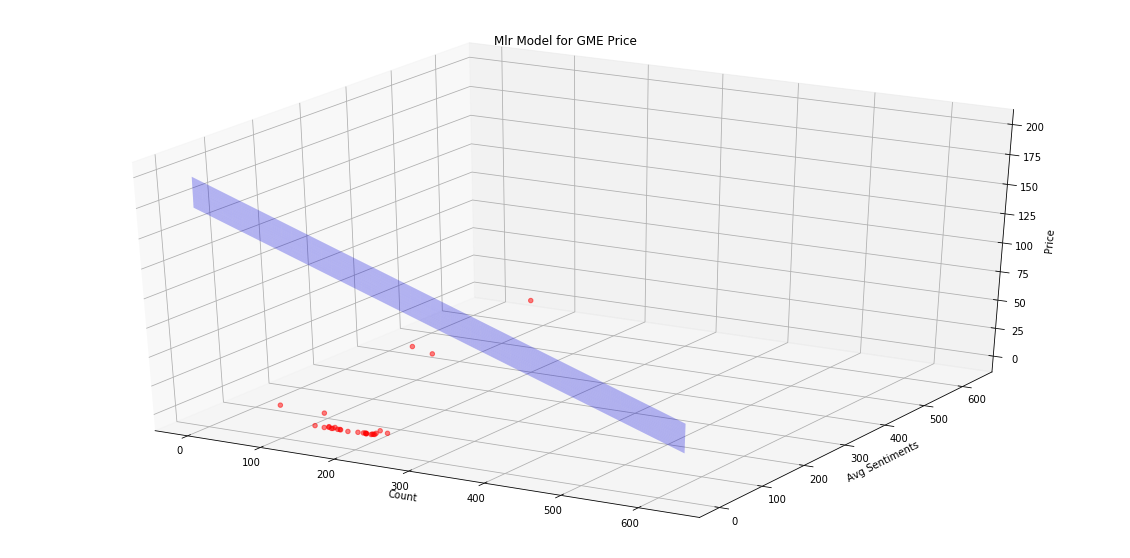

In [7]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
df2 =pd.DataFrame()

x = memecombined[['count_gme_body', 'compound_mean_gme_body']]
y = memecombined['GME']
df2[['Count', 'Avg']] =x
df2['GME'] = pd.Series(y)
Regressor = LinearRegression()
Regressor.fit(x,y)
x_surf, y_surf = np.meshgrid(np.linspace(df2.Count.min(), df2.Count.max(), 100),np.linspace(df2.Avg.min(), df2.Avg.max(), 100))
onlyX = pd.DataFrame({'Count': x_surf.ravel(), 'Avg': y_surf.ravel()})
fittedY=Regressor.predict(onlyX)
fittedY=np.array(fittedY)




fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['GME'],df2['Count'],df2['Avg'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Count')
ax.set_ylabel('Avg Sentiments')
ax.set_zlabel('Price')
plt.title('Mlr Model for GME Price')
plt.show()



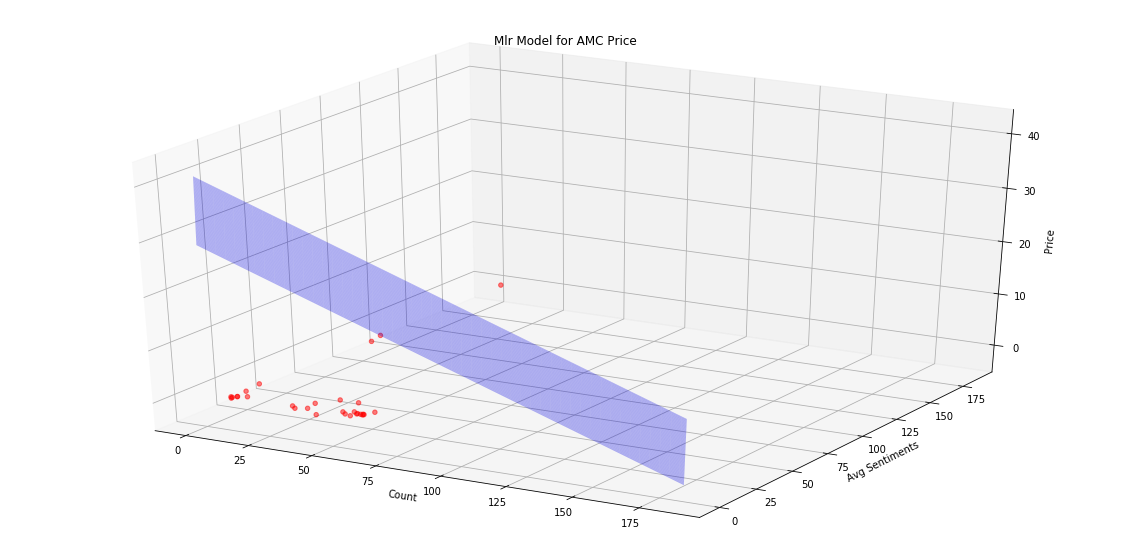

In [8]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
df2 =pd.DataFrame()

x = memecombined[['count_amc_body', 'compound_mean_amc_body']]
y = memecombined['AMC']
df2[['Count', 'Avg']] =x
df2['AMC'] = pd.Series(y)
Regressor = LinearRegression()
Regressor.fit(x,y)
x_surf, y_surf = np.meshgrid(np.linspace(df2.Count.min(), df2.Count.max(), 100),np.linspace(df2.Avg.min(), df2.Avg.max(), 100))
onlyX = pd.DataFrame({'Count': x_surf.ravel(), 'Avg': y_surf.ravel()})
fittedY=Regressor.predict(onlyX)
fittedY=np.array(fittedY)




fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['AMC'],df2['Count'],df2['Avg'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Count')
ax.set_ylabel('Avg Sentiments')
ax.set_zlabel('Price')
plt.title('Mlr Model for AMC Price')
plt.show()



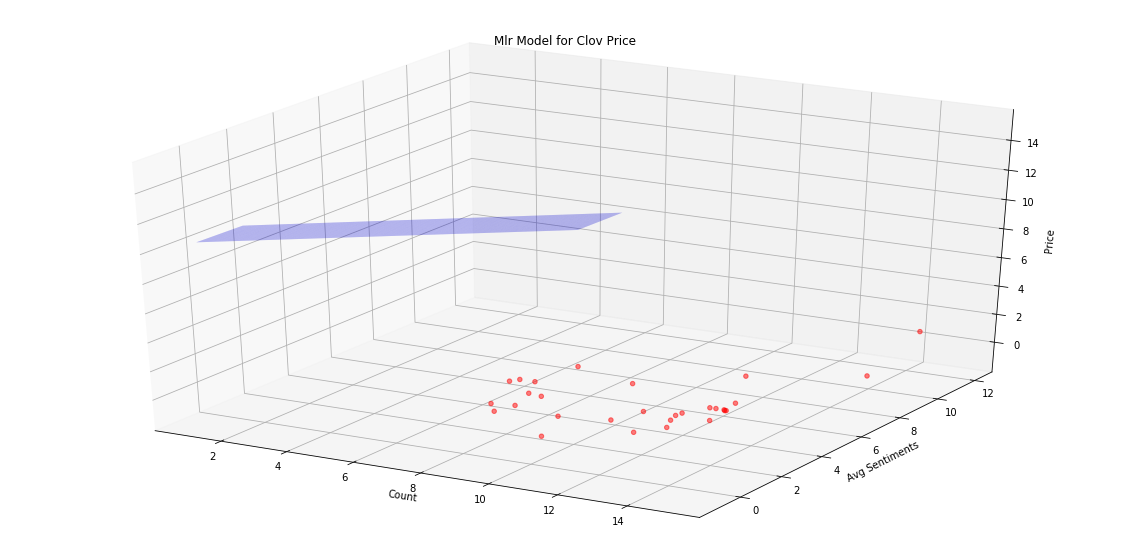

In [9]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
df2 =pd.DataFrame()

x = memecombined[['count_clov_body', 'compound_mean_clov_body']]
y = memecombined['Clov']
df2[['Count', 'Avg']] =x
df2['Clov'] = pd.Series(y)
Regressor = LinearRegression()
Regressor.fit(x,y)
x_surf, y_surf = np.meshgrid(np.linspace(df2.Count.min(), df2.Count.max(), 100),np.linspace(df2.Avg.min(), df2.Avg.max(), 100))
onlyX = pd.DataFrame({'Count': x_surf.ravel(), 'Avg': y_surf.ravel()})
fittedY=Regressor.predict(onlyX)
fittedY=np.array(fittedY)




fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Clov'],df2['Count'],df2['Avg'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Count')
ax.set_ylabel('Avg Sentiments')
ax.set_zlabel('Price')
plt.title('Mlr Model for Clov Price')
plt.show()




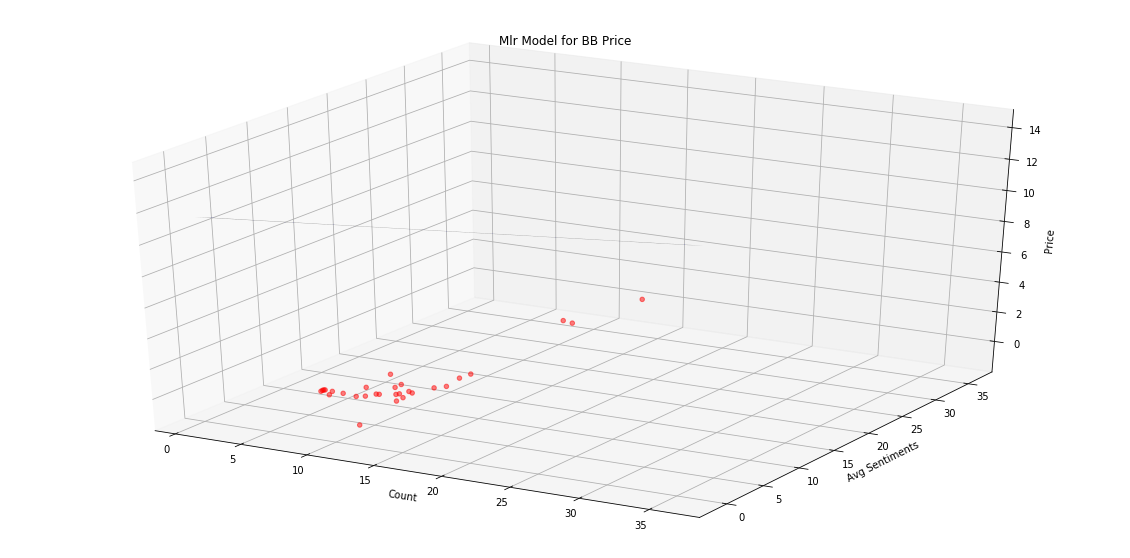

In [11]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
df2 =pd.DataFrame()

x = memecombined[['count_bb_body', 'compound_mean_bb_body']]
y = memecombined['BB']
df2[['Count', 'Avg']] =x
df2['BB'] = pd.Series(y)
Regressor = LinearRegression()
Regressor.fit(x,y)
x_surf, y_surf = np.meshgrid(np.linspace(df2.Count.min(), df2.Count.max(), 100),np.linspace(df2.Avg.min(), df2.Avg.max(), 100))
onlyX = pd.DataFrame({'Count': x_surf.ravel(), 'Avg': y_surf.ravel()})
fittedY=Regressor.predict(onlyX)
fittedY=np.array(fittedY)




fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['BB'],df2['Count'],df2['Avg'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Count')
ax.set_ylabel('Avg Sentiments')
ax.set_zlabel('Price')
plt.title('Mlr Model for BB Price')
plt.show()


